In [484]:
import pandas as pd
import numpy as np
from sklearn.impute import KNNImputer
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
import joblib
import tensorflow as tf

In [485]:
df = pd.read_csv('C:/Users/FRANK/Desktop/Proyectos Linkedin/Python Proyectos/Redes Neuronales/Dia 24\customer_churn_data.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,CUST0000,Male,0,No,Yes,23,No,No phone service,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Bank transfer,49.85,1146.55,No
1,CUST0001,Female,0,Yes,No,43,No,No phone service,DSL,Yes,...,Yes,No,Yes,No,Month-to-month,No,Mailed check,100.70,4330.10,Yes
2,CUST0002,Male,1,No,No,51,Yes,No,DSL,No,...,Yes,Yes,No,No,One year,No,Electronic check,97.33,4963.83,Yes
3,CUST0003,Male,1,No,No,72,Yes,Yes,DSL,Yes,...,Yes,No,No,No,Month-to-month,No,Credit card,101.38,7299.36,No
4,CUST0004,Male,1,No,No,25,Yes,Yes,DSL,No,...,No,Yes,No,Yes,Month-to-month,No,Electronic check,52.22,1305.50,Yes


In [486]:
df2 = df.copy()
print('Número de observaciones (filas) = {}'.format(df2.shape[0]))
print('Total de variables disponibles (columnas) = {} '.format(df2.columns.shape[0]))
print('Columnas que cuentan con un valor nulo -')
print(df2.isnull().sum())

Número de observaciones (filas) = 5880
Total de variables disponibles (columnas) = 21 
Columnas que cuentan con un valor nulo -
customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


In [487]:
df2['Churn'].value_counts()

Churn
No     2982
Yes    2898
Name: count, dtype: int64

In [488]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5880 entries, 0 to 5879
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        5880 non-null   object 
 1   gender            5880 non-null   object 
 2   SeniorCitizen     5880 non-null   int64  
 3   Partner           5880 non-null   object 
 4   Dependents        5880 non-null   object 
 5   tenure            5880 non-null   int64  
 6   PhoneService      5880 non-null   object 
 7   MultipleLines     5880 non-null   object 
 8   InternetService   5880 non-null   object 
 9   OnlineSecurity    5880 non-null   object 
 10  OnlineBackup      5880 non-null   object 
 11  DeviceProtection  5880 non-null   object 
 12  TechSupport       5880 non-null   object 
 13  StreamingTV       5880 non-null   object 
 14  StreamingMovies   5880 non-null   object 
 15  Contract          5880 non-null   object 
 16  PaperlessBilling  5880 non-null   object 


In [489]:
# Remplazar por 0 y 1

binario = {'gender': {'Male':1,'Female':0},
          'Partner': {'Yes': 1,'No':0},
       'Dependents': {'No':0,'Yes':1},
     'PhoneService': {'Yes':1,'No':0},
 'PaperlessBilling': {'Yes':1,'No':0},
            'Churn': {'No':0,'Yes':1}}

for column, mapping in binario.items():
  df2[column] = df2[column].map(mapping)

In [490]:
df2.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,CUST0000,1,0,0,1,23,0,No phone service,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,1,Bank transfer,49.85,1146.55,0
1,CUST0001,0,0,1,0,43,0,No phone service,DSL,Yes,...,Yes,No,Yes,No,Month-to-month,0,Mailed check,100.70,4330.10,1
2,CUST0002,1,1,0,0,51,1,No,DSL,No,...,Yes,Yes,No,No,One year,0,Electronic check,97.33,4963.83,1
3,CUST0003,1,1,0,0,72,1,Yes,DSL,Yes,...,Yes,No,No,No,Month-to-month,0,Credit card,101.38,7299.36,0
4,CUST0004,1,1,0,0,25,1,Yes,DSL,No,...,No,Yes,No,Yes,Month-to-month,0,Electronic check,52.22,1305.50,1


In [491]:
# Definir características numéricas y categóricas

numeric_features = ['tenure','MonthlyCharges','TotalCharges']
categorical_features = ['MultipleLines','InternetService','OnlineBackup','OnlineSecurity','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','PaymentMethod']

In [492]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df2[numeric_features] = scaler.fit_transform(df2[numeric_features]) # type: ignore

In [493]:
# One-Hot Encoding para características categóricas
enc = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
encoded_cats = enc.fit_transform(df2[categorical_features])

In [494]:
# Crear DataFrame para las características codificadas
encoded_cats_df = pd.DataFrame(encoded_cats, columns=enc.get_feature_names_out(categorical_features))
df2 = pd.concat([df2, encoded_cats_df], axis=1)

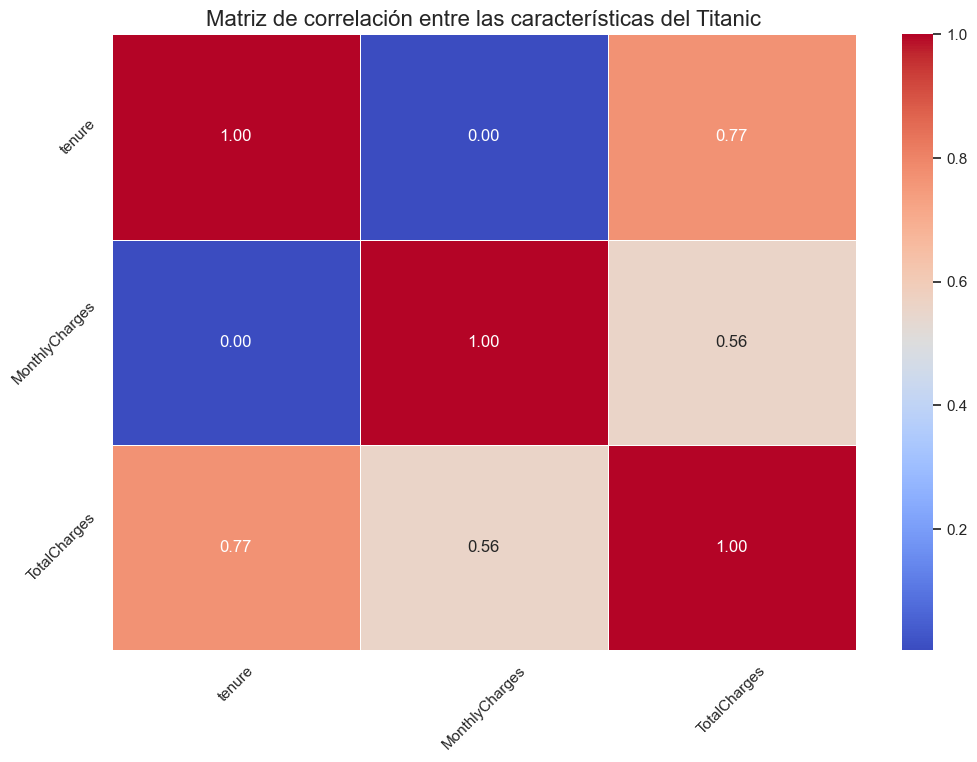

In [495]:

# Seleccionar las columnas para la matriz de correlación
columns_corr = ['tenure','MonthlyCharges','TotalCharges']
matriz_corr = df2[columns_corr].corr()  # Calcula la correlación entre las columnas seleccionadas

# Configurar el tamaño de la figura
plt.figure(figsize=(12, 8))

# Establecer el estilo de Seaborn
sns.set(style='white')

# Generar el mapa de calor para la matriz de correlación
sns.heatmap(matriz_corr, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)

# Título y ajustes finales
plt.title('Matriz de correlación entre las características del Titanic', fontsize=16)
plt.xticks(rotation=45)
plt.yticks(rotation=45)

# Mostrar el gráfico
plt.show()

In [496]:
df2.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer,PaymentMethod_Credit card,PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,CUST0000,1,0,0,1,-0.648040,0,No phone service,No,No internet service,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
1,CUST0001,0,0,1,0,0.308537,0,No phone service,DSL,Yes,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,CUST0002,1,1,0,0,0.691167,1,No,DSL,No,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,CUST0003,1,1,0,0,1.695572,1,Yes,DSL,Yes,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
4,CUST0004,1,1,0,0,-0.552382,1,Yes,DSL,No,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


# Predecir

In [497]:
df2 = df2.drop(columns=['customerID','MultipleLines','OnlineBackup','InternetService','OnlineSecurity',
                        'DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','PaymentMethod'])

In [498]:
df2.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,...,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer,PaymentMethod_Credit card,PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,0,1,-0.648040,0,1,-0.705078,-0.743650,0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0,0,1,0,0.308537,0,0,1.060414,0.923257,1,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,1,1,0,0,0.691167,1,0,0.943409,1.255078,1,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,1,1,0,0,1.695572,1,0,1.084023,2.477961,0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
4,1,1,0,0,-0.552382,1,0,-0.622793,-0.660423,1,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [499]:
# Definir X e y
X = df2.drop(columns=['Churn'])
y = df2['Churn']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [500]:
df2.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,...,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer,PaymentMethod_Credit card,PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,0,1,-0.648040,0,1,-0.705078,-0.743650,0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0,0,1,0,0.308537,0,0,1.060414,0.923257,1,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,1,1,0,0,0.691167,1,0,0.943409,1.255078,1,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,1,1,0,0,1.695572,1,0,1.084023,2.477961,0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
4,1,1,0,0,-0.552382,1,0,-0.622793,-0.660423,1,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [501]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5880 entries, 0 to 5879
Data columns (total 41 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   gender                                5880 non-null   int64  
 1   SeniorCitizen                         5880 non-null   int64  
 2   Partner                               5880 non-null   int64  
 3   Dependents                            5880 non-null   int64  
 4   tenure                                5880 non-null   float64
 5   PhoneService                          5880 non-null   int64  
 6   PaperlessBilling                      5880 non-null   int64  
 7   MonthlyCharges                        5880 non-null   float64
 8   TotalCharges                          5880 non-null   float64
 9   Churn                                 5880 non-null   int64  
 10  MultipleLines_No                      5880 non-null   float64
 11  MultipleLines_No 

In [502]:
oculta  = tf.keras.layers.Dense(units=64,activation='relu',input_shape=[40])
dropout = tf.keras.layers.Dropout(0.2)
oculta1 = tf.keras.layers.Dense(units=64,activation='relu')
dropout1 = tf.keras.layers.Dropout(0.2)
oculta2 = tf.keras.layers.Dense(units=64,activation='relu')
dropout2 = tf.keras.layers.Dropout(0.2)
salida = tf.keras.layers.Dense(units=1, activation='sigmoid')
modelo = tf.keras.Sequential([oculta,dropout,oculta1,dropout1,oculta2,dropout2,salida])

In [503]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5880 entries, 0 to 5879
Data columns (total 41 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   gender                                5880 non-null   int64  
 1   SeniorCitizen                         5880 non-null   int64  
 2   Partner                               5880 non-null   int64  
 3   Dependents                            5880 non-null   int64  
 4   tenure                                5880 non-null   float64
 5   PhoneService                          5880 non-null   int64  
 6   PaperlessBilling                      5880 non-null   int64  
 7   MonthlyCharges                        5880 non-null   float64
 8   TotalCharges                          5880 non-null   float64
 9   Churn                                 5880 non-null   int64  
 10  MultipleLines_No                      5880 non-null   float64
 11  MultipleLines_No 

In [504]:
modelo.compile(optimizer=tf.keras.optimizers.Adam(0.1),loss='binary_crossentropy',metrics=['accuracy'])

In [505]:
# Implementar el early_stopping
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience=10,restore_best_weights=True)

In [506]:
print('Comenzando entrenamiento')
historial = modelo.fit(X_train,y_train,epochs=1000,verbose=False)
print('Modelo entrenado')

Comenzando entrenamiento
Modelo entrenado


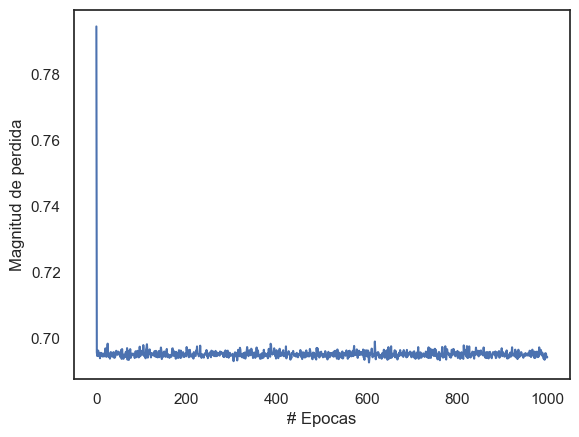

In [507]:
plt.xlabel('# Epocas')
plt.ylabel('Magnitud de perdida')
plt.plot(historial.history['loss'])

In [508]:
# Realizar la predicción
print('Vamos a hacer una predicción')
nuevo_dato = np.array([[1, 3, 10, 70, 10, 10, 15,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]])  # Ejemplo de nuevo dato con las 7 características numéricas
nuevo_dato[:, :3] = scaler.transform(nuevo_dato[:, :3])  # Escalar las características numéricas
resultado = modelo.predict(nuevo_dato)

print(f'El resultado es: {resultado[0][0]}')

Vamos a hacer una predicción
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
El resultado es: 0.5452923774719238


In [509]:
# Realizar predicciones usando el modelo entrenado
predicciones = modelo.predict(X)

predicciones_binarias = (predicciones > 0.5).astype(int).flatten()

df2['Churn_pred'] = predicciones_binarias

# Verificar las primeras filas del DataFrame con las predicciones
print(df2.head())

184/184 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
   gender  SeniorCitizen  Partner  Dependents    tenure  PhoneService  \
0       1              0        0           1 -0.648040             0   
1       0              0        1           0  0.308537             0   
2       1              1        0           0  0.691167             1   
3       1              1        0           0  1.695572             1   
4       1              1        0           0 -0.552382             1   

   PaperlessBilling  MonthlyCharges  TotalCharges  Churn  ...  \
0                 1       -0.705078     -0.743650      0  ...   
1                 0        1.060414      0.923257      1  ...   
2                 0        0.943409      1.255078      1  ...   
3                 0        1.084023      2.477961      0  ...   
4                 0       -0.622793     -0.660423      1  ...   

   StreamingMovies_No internet service  StreamingMovies_Yes  \
0                                  1.0                  0.0   
1  

In [510]:
# Convertir la probabilidad a una predicción binaria
prediccion_binaria = (resultado > 0.5).astype(int)

# Imprimir el resultado y la predicción
print(f'El resultado es: {prediccion_binaria[0][0]}')
if prediccion_binaria[0][0] == 0:
    print(f'El resultado es: {prediccion_binaria[0][0]}, predicción: 0, Abandono')
else:
    print(f'El resultado es: {prediccion_binaria[0][0]}, predicción: 1, No abandono')

El resultado es: 1
El resultado es: 1, predicción: 1, No abandono


In [511]:
# Data Real

df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,CUST0000,Male,0,No,Yes,23,No,No phone service,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Bank transfer,49.85,1146.55,No
1,CUST0001,Female,0,Yes,No,43,No,No phone service,DSL,Yes,...,Yes,No,Yes,No,Month-to-month,No,Mailed check,100.70,4330.10,Yes
2,CUST0002,Male,1,No,No,51,Yes,No,DSL,No,...,Yes,Yes,No,No,One year,No,Electronic check,97.33,4963.83,Yes
3,CUST0003,Male,1,No,No,72,Yes,Yes,DSL,Yes,...,Yes,No,No,No,Month-to-month,No,Credit card,101.38,7299.36,No
4,CUST0004,Male,1,No,No,25,Yes,Yes,DSL,No,...,No,Yes,No,Yes,Month-to-month,No,Electronic check,52.22,1305.50,Yes


In [512]:
df3 = df.copy()
df3['Churn_pred'] = predicciones_binarias
df3.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Churn_pred
0,CUST0000,Male,0,No,Yes,23,No,No phone service,No,No internet service,...,No internet service,No internet service,No internet service,Month-to-month,Yes,Bank transfer,49.85,1146.55,No,1
1,CUST0001,Female,0,Yes,No,43,No,No phone service,DSL,Yes,...,No,Yes,No,Month-to-month,No,Mailed check,100.70,4330.10,Yes,1
2,CUST0002,Male,1,No,No,51,Yes,No,DSL,No,...,Yes,No,No,One year,No,Electronic check,97.33,4963.83,Yes,1
3,CUST0003,Male,1,No,No,72,Yes,Yes,DSL,Yes,...,No,No,No,Month-to-month,No,Credit card,101.38,7299.36,No,1
4,CUST0004,Male,1,No,No,25,Yes,Yes,DSL,No,...,Yes,No,Yes,Month-to-month,No,Electronic check,52.22,1305.50,Yes,1


In [513]:
churn_1_0 = {'No':0,'Yes':1}
df3['Churn'] = df3['Churn'].map(churn_1_0)
df3.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Churn_pred
0,CUST0000,Male,0,No,Yes,23,No,No phone service,No,No internet service,...,No internet service,No internet service,No internet service,Month-to-month,Yes,Bank transfer,49.85,1146.55,0,1
1,CUST0001,Female,0,Yes,No,43,No,No phone service,DSL,Yes,...,No,Yes,No,Month-to-month,No,Mailed check,100.70,4330.10,1,1
2,CUST0002,Male,1,No,No,51,Yes,No,DSL,No,...,Yes,No,No,One year,No,Electronic check,97.33,4963.83,1,1
3,CUST0003,Male,1,No,No,72,Yes,Yes,DSL,Yes,...,No,No,No,Month-to-month,No,Credit card,101.38,7299.36,0,1
4,CUST0004,Male,1,No,No,25,Yes,Yes,DSL,No,...,Yes,No,Yes,Month-to-month,No,Electronic check,52.22,1305.50,1,1


In [514]:
# Comparar las predicciones con los valores reales
correct_prediction = (df3['Churn_pred'] == df3['Churn']).sum()

In [515]:
total_predicciones = len(df3)
precisión = (correct_prediction / total_predicciones) * 100
print(f'Precisión: {precisión:.2f}%')

margen_de_error = 100 - precisión
print(f'Margen de error: {margen_de_error:.2f}%')

Precisión: 49.29%
Margen de error: 50.71%


In [516]:
df3['Churn'].value_counts()

Churn
0    2982
1    2898
Name: count, dtype: int64

In [517]:
df3['Churn_pred'].value_counts()

Churn_pred
1    5880
Name: count, dtype: int64